In [1]:
# Specify the root directory containing the subfolders
root_directory = 'C:/Users/saisr/OneDrive/Desktop/random forest model/EMG Physical Action Data Set'

In [2]:
import os
import glob
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import np_utils

In [3]:
# Use glob to find all CSV files in the subfolders
csv_files = glob.glob(os.path.join(root_directory, '*/*.csv'))
# Concatenate all CSV files into a single DataFrame
dataset = pd.concat(map(pd.read_csv, csv_files))
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.dropna(axis=0, inplace=True)

In [4]:
# Dividing into independent feature matrix & dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# Encode the labels
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [6]:
# Feature Scaling - Standardization
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# Splitting the dataset into Training & Testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
model.add(Dense(y.shape[1], activation='softmax'))

In [10]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Training the model
model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/6
8722/8722 [==============================] - 127s 14ms/step - loss: 0.3945 - accuracy: 0.8245 - val_loss: 0.3304 - val_accuracy: 0.8576
Epoch 2/6
8722/8722 [==============================] - 117s 13ms/step - loss: 0.3057 - accuracy: 0.8689 - val_loss: 0.2950 - val_accuracy: 0.8728
Epoch 3/6
8722/8722 [==============================] - 117s 13ms/step - loss: 0.2833 - accuracy: 0.8787 - val_loss: 0.2784 - val_accuracy: 0.8811
Epoch 4/6
8722/8722 [==============================] - 121s 14ms/step - loss: 0.2716 - accuracy: 0.8841 - val_loss: 0.2733 - val_accuracy: 0.8822
Epoch 5/6
8722/8722 [==============================] - 134s 15ms/step - loss: 0.2638 - accuracy: 0.8874 - val_loss: 0.2701 - val_accuracy: 0.8831
Epoch 6/6
8722/8722 [==============================] - 129s 15ms/step - loss: 0.2577 - accuracy: 0.8899 - val_loss: 0.2672 - val_accuracy: 0.8848


In [13]:
# Evaluating the model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy * 100))

7476/7476 [==============================] - 40s 5ms/step - loss: 0.2672 - accuracy: 0.8848
Accuracy: 88.48


7476/7476 [==============================] - 36s 5ms/step


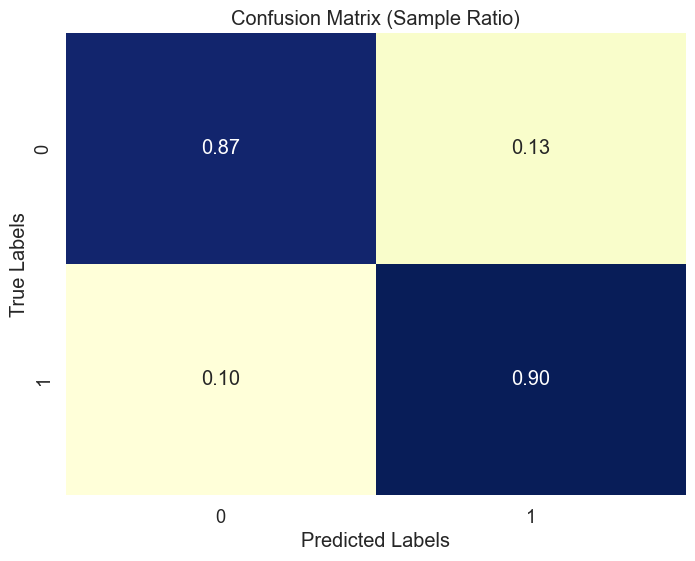

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you've already trained your model and have it ready

# Step 1: Make predictions on the test dataset
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Step 2: Compute the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Step 3: Calculate the ratio of sample_out/total_samples
confusion_ratio = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Step 4: Use Seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed

# Create a heatmap
sns.heatmap(confusion_ratio, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)

# Set axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Sample Ratio)")
plt.savefig('cmlstm.png')
# Show the plot
plt.show()
